In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import seaborn as sns

## Data Cleaning and Visualization

In [4]:
df = pd.read_csv('./data/train.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

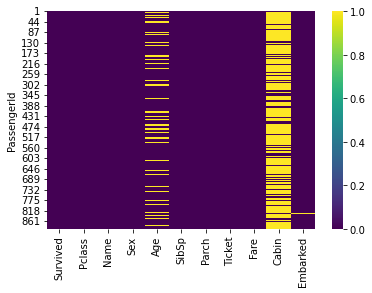

In [6]:
sns.heatmap(df.isna(),cmap='viridis')

Null values occur in Age, Cabin and Embarked

### How do we fill up these null values?
For age, i propose we fill it up with the average age within each name title

In [7]:
df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [8]:
import re
def strip_title(name):
    list = re.findall("[A-Za-z]+\.",name)
    if(len(list)==0):
        return 'Child'
    else:
        return list[0]

In [9]:
df['Name'].apply(strip_title).value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [10]:
df['titles'] = df['Name'].apply(strip_title)

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [12]:
df['titles'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [13]:
df['titles'].replace(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'],['Mr','Mrs','Miss','Mr','Mr','Mr','Miss','Miss','Mr','Miss','Mr','Miss','Mr','Mr','Mr','Mrs','Mr'],inplace=True)

In [14]:
df.groupby('titles').agg({'Age':np.mean})

,Age
titles,
Miss,23.083333
Mr,30.499265
Mrs,35.871560


In [15]:
df.loc[(df['Age'].isna()) & (df['titles']=='Miss'),'Age'] = 23

In [16]:
df.loc[(df['Age'].isna()) & (df['titles']=='Mr'),'Age'] = 30

In [17]:
df.loc[(df['Age'].isna()) & (df['titles']=='Mrs'),'Age'] = 36

<AxesSubplot:ylabel='PassengerId'>

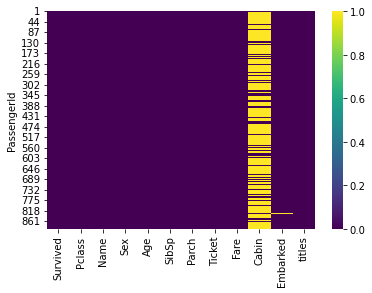

In [18]:
sns.heatmap(df.isna(),cmap='viridis')

In [19]:
df['Cabin'].fillna('no cabin',inplace=True)

In [20]:
df.drop(df[df['Embarked'].isna()].index,inplace=True)

# Machine Learning Prediction

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no cabin,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no cabin,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no cabin,S,Mr


In [23]:
def first_letter(x):
    if(x != 'no cabin'):
        return x[0]
    else:
        return x

In [24]:
df['Cabin'] = df['Cabin'].apply(first_letter)

In [25]:
df['Cabin'].value_counts()

no cabin    687
C            59
B            45
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin, dtype: int64

In [26]:
predictors = ['Pclass','Sex','Age','Fare','Cabin']
response = 'Survived'
X = df[predictors]
y = df[response]


In [27]:
X = pd.concat([X, pd.get_dummies(X['Pclass'],drop_first=True)],axis=1)

In [28]:
X = pd.concat([X,pd.get_dummies(df['Sex'],drop_first=True)],axis=1)

In [29]:
X = pd.concat([X,pd.get_dummies(df['Cabin'],drop_first=True)],axis=1)

In [30]:
X.drop(columns=['Pclass','Sex','Cabin','T'],axis=1,inplace=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
lg_mod = LogisticRegression()

In [33]:
lg_mod.fit(X_train,y_train)

C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lg_mod.coef_

array([[-0.03336848,  0.00280714,  0.01269491, -1.15737783, -2.37619323,
         0.08740572, -0.28326367,  0.88064931,  0.68116483, -0.12789466,
         0.18439646, -0.79065392]])

In [35]:
pred = lg_mod.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,pred)

0.8095238095238095

## Quadratic Discriminant Analysis

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [39]:
qd_mod = QuadraticDiscriminantAnalysis()

In [40]:
qd_mod.fit(X_train,y_train)

C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [41]:
pred = qd_mod.predict(X_test)

C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Dell 5480\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [42]:
accuracy_score(y_test,pred)

0.6258503401360545

## Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
ld_mod = LinearDiscriminantAnalysis()

In [45]:
ld_mod.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [46]:
pred = ld_mod.predict(X_test)

In [47]:
accuracy_score(y_test,pred)

0.8095238095238095

In [48]:
test_data = pd.read_csv('./data/test.csv',index_col='PassengerId')
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [50]:
test_data['titles'] = test_data['Name'].str.extract('([A-Za-z]+)\.').replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme',
       'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt',
       'Countess', 'Jonkheer'],['Mr','Mrs','Miss','Mr','Mr','Mr','Miss','Miss','Mr','Miss','Mr','Miss','Mr','Mr','Mr','Mrs','Mr'])

In [51]:
test_data.drop(test_data[test_data['titles']=='Dona'].index,inplace=True)

In [52]:
test_data.drop(test_data[test_data['Fare'].isna()].index,inplace=True)

In [53]:
test_data['Cabin'].fillna('no cabin',inplace=True)

In [54]:
test_data['Cabin'] = test_data['Cabin'].apply(first_letter)

In [55]:
test_data['Cabin'].value_counts()

no cabin    326
C            34
B            18
D            13
E             9
F             8
A             7
G             1
Name: Cabin, dtype: int64

In [56]:
test_data.groupby('titles').agg({'Age':np.mean})

,Age
titles,
Miss,22.255231
Mr,30.011872
Mrs,38.903226


In [57]:
test_data.loc[(test_data['Age'].isna()) & (test_data['titles']=='Miss'),'Age'] = 22

In [58]:
test_data.loc[(test_data['Age'].isna()) & (test_data['titles']=='Mr'),'Age'] = 30

In [59]:
test_data.loc[(test_data['Age'].isna()) & (test_data['titles']=='Mrs'),'Age'] = 38

In [60]:
test_data.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
titles      0
dtype: int64

In [61]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,no cabin,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,no cabin,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,no cabin,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,no cabin,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,no cabin,S,Mrs


In [62]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Pclass'],drop_first=True)],axis=1)

In [63]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Sex'],drop_first=True)],axis=1)

In [64]:
X.head()

,Age,Fare,2,3,male,B,C,D,E,F,G,no cabin
PassengerId,,,,,,,,,,,,
1,22.0,7.2500,0,1,1,0,0,0,0,0,0,1
2,38.0,71.2833,0,0,0,0,1,0,0,0,0,0
3,26.0,7.9250,0,1,0,0,0,0,0,0,0,1
4,35.0,53.1000,0,0,0,0,1,0,0,0,0,0
5,35.0,8.0500,0,1,1,0,0,0,0,0,0,1


In [65]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Cabin'],drop_first=True)],axis=1)

In [66]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,2,3,male,B,C,D,E,F,G,no cabin
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,no cabin,Q,...,0,1,1,0,0,0,0,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,no cabin,S,...,0,1,0,0,0,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,no cabin,Q,...,1,0,1,0,0,0,0,0,0,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,no cabin,S,...,0,1,1,0,0,0,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,no cabin,S,...,0,1,0,0,0,0,0,0,0,1


In [67]:
test_data.drop(columns=['Pclass','Name','Sex','Ticket','Embarked','SibSp','Parch','titles','Cabin'],inplace=True)

In [68]:
test_data.head()

,Age,Fare,Cabin,2,3,male,B,C,D,E,F,G,no cabin
PassengerId,,,,,,,,,,,,,
892,34.5,7.8292,no cabin,0,1,1,0,0,0,0,0,0,1
893,47.0,7.0000,no cabin,0,1,0,0,0,0,0,0,0,1
894,62.0,9.6875,no cabin,1,0,1,0,0,0,0,0,0,1
895,27.0,8.6625,no cabin,0,1,1,0,0,0,0,0,0,1
896,22.0,12.2875,no cabin,0,1,0,0,0,0,0,0,0,1


In [72]:
predictors = ['Age','Fare',2,3,'male','B','C','D','E','F','G','no cabin']
X_test = test_data[predictors]
X_test.head()

,Age,Fare,2,3,male,B,C,D,E,F,G,no cabin
PassengerId,,,,,,,,,,,,
892,34.5,7.8292,0,1,1,0,0,0,0,0,0,1
893,47.0,7.0000,0,1,0,0,0,0,0,0,0,1
894,62.0,9.6875,1,0,1,0,0,0,0,0,0,1
895,27.0,8.6625,0,1,1,0,0,0,0,0,0,1
896,22.0,12.2875,0,1,0,0,0,0,0,0,0,1


In [73]:
final_pred = lg_mod.predict(X_test)

In [74]:
final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,